# La estérica Julia y sus amigos Python-Matlab

## Ser o no Ser Boussinesq

### No-Bousinesq (Realidad)

$$dM=\rho dV=cte$$
$$\rho \nabla \cdot \vec {u}=-\dfrac{D\rho}{Dt}$$
$$\int_{H}^{\eta} \rho \nabla \cdot \vec {u}=- \int_{H}^{\eta} \dfrac{D\rho}{Dt}$$

###Boussinesq

$$dV=\dfrac{dM}{\rho}=cte$$
$$\nabla \cdot \vec {u}=0$$
$$\int_{H}^{\eta} \rho \nabla \cdot \vec {u}=0$$
     

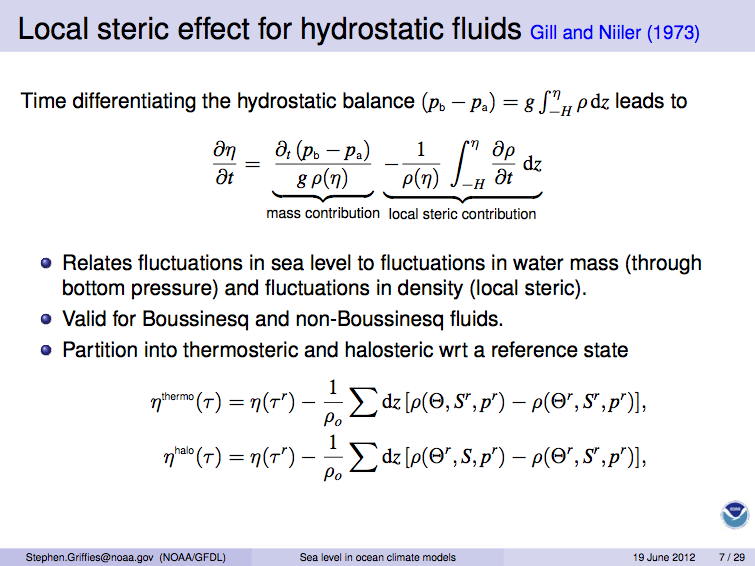

In [3]:
    using PyCall
@pyimport IPython.display as d
d.Image(filename="/Users/julios/JULIA/files/steric1.png")

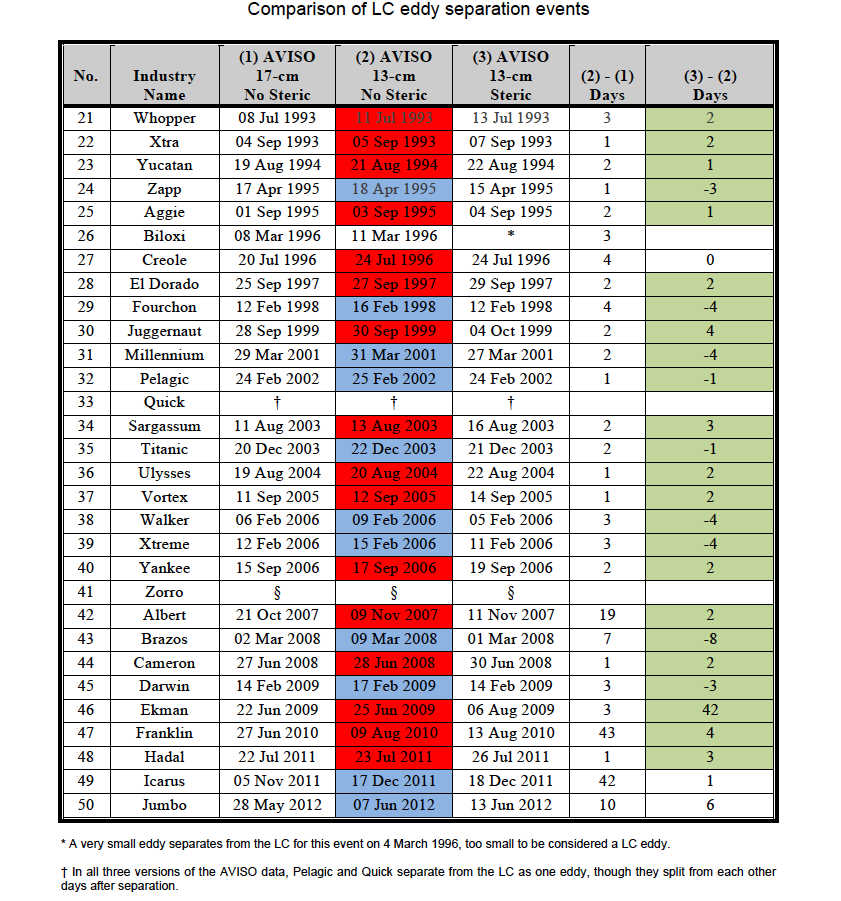

In [4]:
d.Image(filename="/Users/julios/Downloads/table_of_detachments.png")

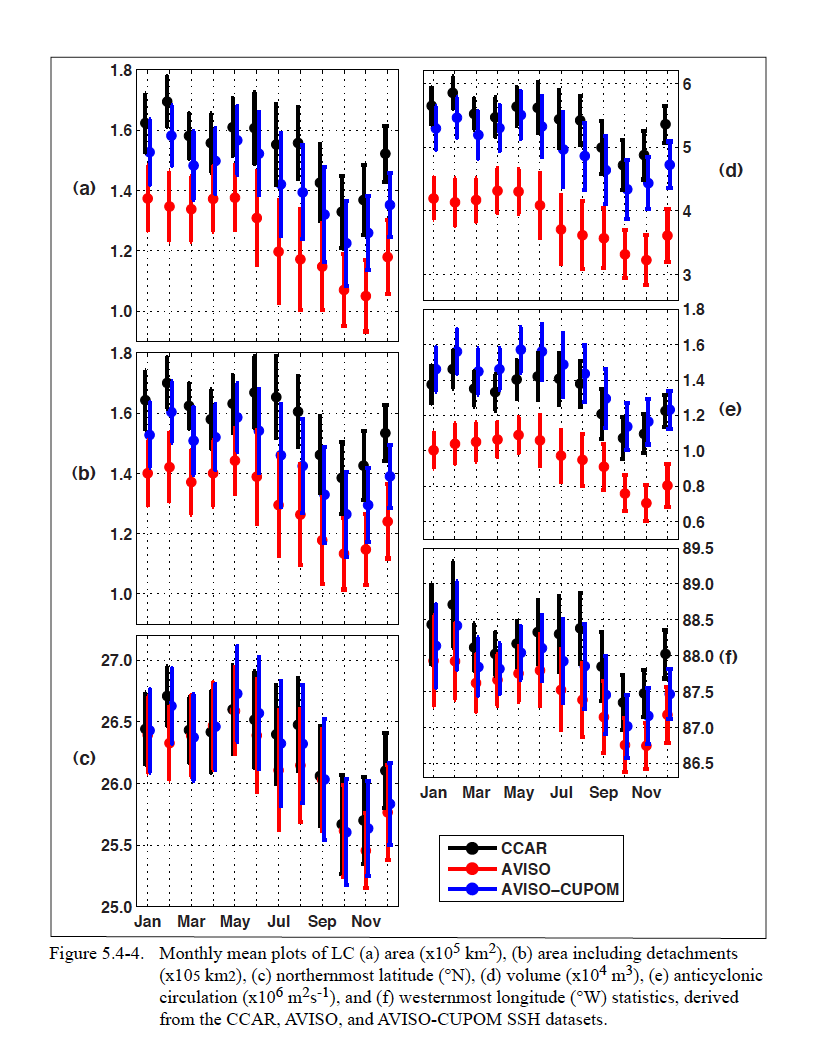

In [5]:
d.Image(filename="/Users/julios/Downloads/lc_statistics.png")

In [6]:
using MAT

In [7]:
f=matread("/Users/julios/Gaby/datos_AVISO_tcanek.mat");

In [8]:
keys(f)

KeyIterator for a Dict{ASCIIString,Any} with 14 entries. Keys:
  "lat"
  "taviso"
  "time34"
  "time6"
  "lon"
  "madt5"
  "time23"
  "MADT"
  "madt23"
  "madt6"
  "madt34"
  "time29"
  "time5"
  "madt29"

In [9]:
SSH=f["MADT"];

In [10]:
size(SSH)

(101,61,232)

In [11]:
using PyPlot

INFO: Loading help data...


In [ ]:

lon=f["lon"];lat=f["lat"];
X=repmat(lon',length(lat),1);
Y=repmat(lat,1,length(lon));

In [ ]:
size(X), size(Y),size(lon)

In [ ]:
ssh=SSH[:,:,10];
ssh=ssh';
size(ssh)

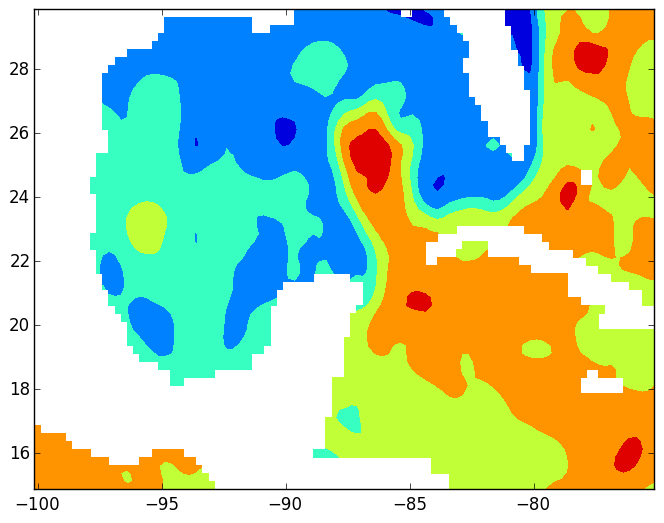

PyObject <matplotlib.contour.QuadContourSet instance at 0x107562368>

In [54]:
contourf(X,Y,ssh)

In [55]:
l,m,n,=size(SSH)

(101,61,232)

In [56]:
ssh1=reshape(SSH,l*m,n);
size(ssh1)

(6161,232)

In [57]:
ii=find(!isnan(ssh1[:,1]));
find(isnan(ssh1[ii,100]))

0-element Array{Int64,1}

In [58]:
ssh2=ssh1[ii,:];

In [59]:
mssh2=mean(ssh2,2);

In [60]:
size(mssh2)

(4601,1)

In [61]:
dssh2=ssh2-repmat(mssh2,1,n);

In [62]:
U,S,V=svd(dssh2*0.001/sqrt(n));

In [63]:
spmeandssh2=mean(dssh2,1)
size(spmeandssh2)

(1,232)

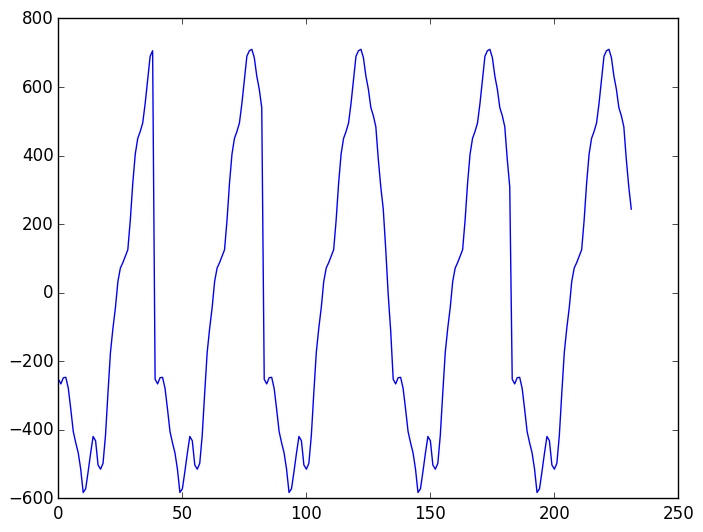

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11dd8df90>

In [64]:
plot(squeeze(spmeandssh2,1))

In [68]:
size(U),size(V)

((4601,232),(232,232))

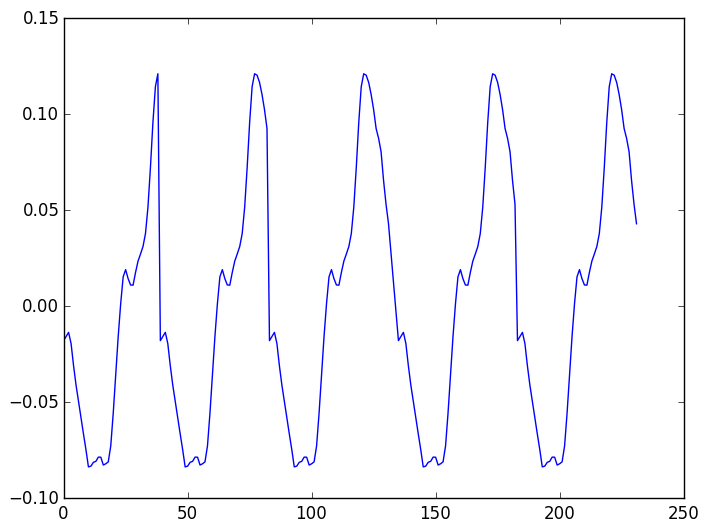

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11d14ec50>

In [70]:
plot(V[:,1])

In [72]:
typeof(f)

Dict{ASCIIString,Any} (constructor with 3 methods)

In [73]:
x=linspace(-10,10,100)

100-element Array{Float64,1}:
 -10.0    
  -9.79798
  -9.59596
  -9.39394
  -9.19192
  -8.9899 
  -8.78788
  -8.58586
  -8.38384
  -8.18182
  -7.9798 
  -7.77778
  -7.57576
   ⋮      
   7.77778
   7.9798 
   8.18182
   8.38384
   8.58586
   8.78788
   8.9899 
   9.19192
   9.39394
   9.59596
   9.79798
  10.0    

In [74]:
size(x)

(100,)